<a href="https://colab.research.google.com/github/romerik/Geospatial_Data_Analysis_Python/blob/main/Python_to_Measure_Climate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python to Measure Climate Data

## Example 1: Examining Climate Prediction with Precipitation Data

In [1]:
!wget https://downloads.psl.noaa.gov//Datasets/cpc_global_precip/precip.2015.nc

--2023-08-24 19:30:04--  https://downloads.psl.noaa.gov//Datasets/cpc_global_precip/precip.2015.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62882761 (60M) [application/x-netcdf]
Saving to: ‘precip.2015.nc’

precip.2015.nc      100%[===================>]  59.97M  41.9MB/s    in 1.4s    

2023-08-24 19:30:05 (41.9 MB/s) - ‘precip.2015.nc’ saved [62882761/62882761]



In [2]:
!wget https://downloads.psl.noaa.gov//Datasets/cpc_global_precip/precip.2021.nc

--2023-08-24 19:32:50--  https://downloads.psl.noaa.gov//Datasets/cpc_global_precip/precip.2021.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59910391 (57M) [application/x-netcdf]
Saving to: ‘precip.2021.nc’

precip.2021.nc      100%[===================>]  57.13M  29.9MB/s    in 1.9s    

2023-08-24 19:32:52 (29.9 MB/s) - ‘precip.2021.nc’ saved [59910391/59910391]



In [3]:
!pip install xarray[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.1 MB/s eta 0:00:00
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25844 sha256=1f7a43606e9db602c158e4469de3612d8602f6a16b6f543d8fe980da0cd394b5
  Stored in directory: /root/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44ba159cb733270b1539004037302a42077
  Crea

In [4]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

In [6]:
ds2015 = xr.open_dataset('/content/precip.2015.nc')
ds2021 = xr.open_dataset('/content/precip.2021.nc')

In [7]:
ds2015_2021 = xr.concat([ds2015,ds2021], dim='time')
ds2015_2021

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 730)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2021-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan ... 0.5242 0.5236 0.5231
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

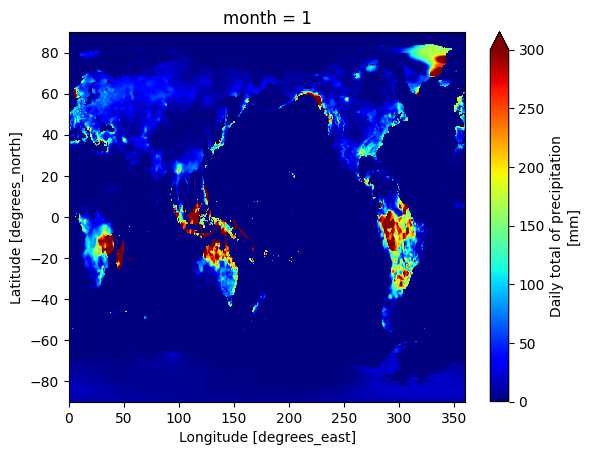

In [11]:
ds2015_mon = ds2015.groupby('time.month').sum()
ds2015_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

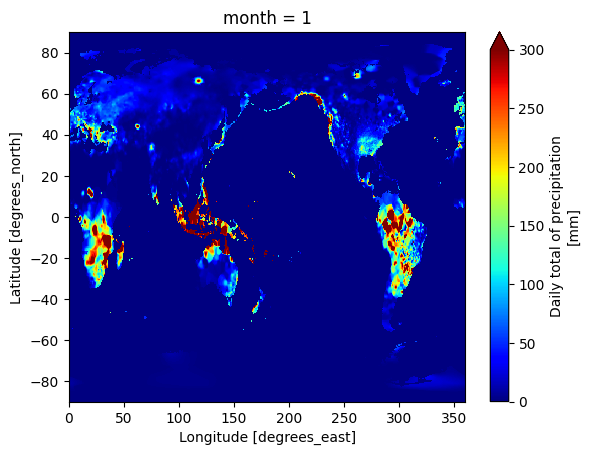

In [12]:
ds2021_mon = ds2021.groupby('time.month').sum()
ds2021_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

In [13]:
import calendar

In [20]:
landmask = ds2015.precip.sum(dim='time')>0

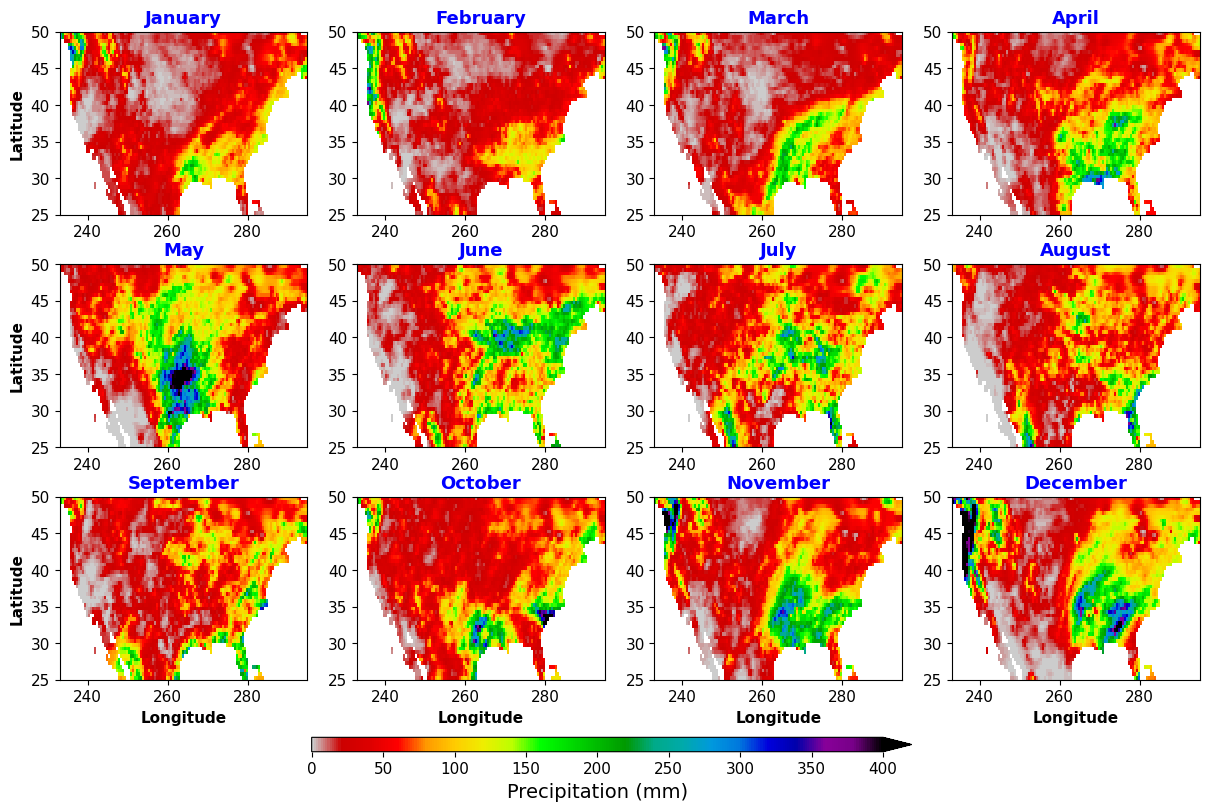

In [21]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, wspace=0.2, hspace=0.27)
nrows = 3
ncols = 4
for i in range(1, 13):
#the python data index starts at 0, but the subplot starts at 1.
  plt.subplot(nrows, ncols, i)
  dataplot = ds2015_mon.precip[i-1, :].where(landmask)
  p = plt.pcolormesh(ds2015_mon.lon, ds2015_mon.lat, dataplot,
                vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                )
  plt.xlim([233,295])
  plt.ylim([25,50])
  plt.title(calendar.month_name[dataplot.month.values], fontsize = 13,
            fontweight = 'bold', color = 'b')
  plt.xticks(fontsize = 11)
  plt.yticks(fontsize = 11)
  if i % ncols == 1: # Add ylabel for the very left subplots
      plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
  if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
      plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2015.png', format = 'png', dpi = 300)

In [22]:
landmask = ds2021.precip.sum(dim='time')>0

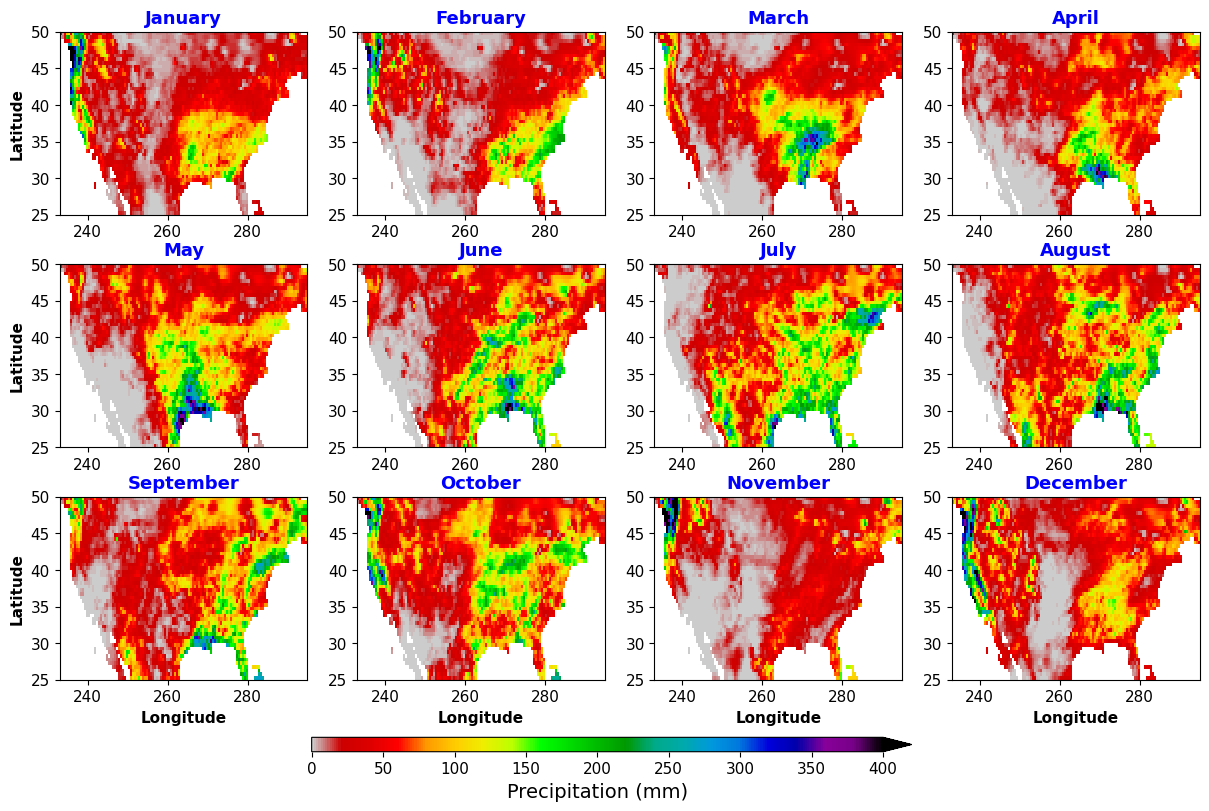

In [23]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, wspace=0.2, hspace=0.27)
nrows = 3
ncols = 4
for i in range(1, 13):
#the python data index starts at 0, but the subplot starts at 1.
  plt.subplot(nrows, ncols, i)
  dataplot = ds2021_mon.precip[i-1, :].where(landmask)
  p = plt.pcolormesh(ds2021_mon.lon, ds2021_mon.lat, dataplot,
                vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                )
  plt.xlim([233,295])
  plt.ylim([25,50])
  plt.title(calendar.month_name[dataplot.month.values], fontsize = 13,
            fontweight = 'bold', color = 'b')
  plt.xticks(fontsize = 11)
  plt.yticks(fontsize = 11)
  if i % ncols == 1: # Add ylabel for the very left subplots
      plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
  if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
      plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2021.png', format = 'png', dpi = 300)

In [28]:
ds2021.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [29]:
seasonal_mean = ds2021.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan ... 0.5242 0.5236 0.5231
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2022-01-02 23:30:58

## Example 2: Deforestation and Carbon Emissions in the Amazon Rain Forest Using WTSS Series

In [30]:
!pip install wtss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wtss: filename=wtss-0.7.0.post3-py3-none-any.whl size=14674 sha256=dc28b7f1aa863a68733a7145b1b08dc982ac248b433b5d9ba20aa6d6e0c67b6c
  Stored in directory: /root/.cache/pip/wheels/57/30/5b/005a7ba2d07ea125638c8eef2f6dc7dec47dfd6f882ed62263
Successfully built wtss


In [31]:
from wtss import WTSS